# Setup

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Loading data

Kaggle link: https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset

Website: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [20]:
#df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')
df = pd.read_csv('BostonHousing.csv')

df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# EDA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Notice multiple null values in RM column. RM: "average number of rooms per dwelling"

In [22]:
df.isnull().sum().sort_values(ascending=False)

rm         5
crim       0
zn         0
indus      0
chas       0
nox        0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [23]:
df.dropna(axis=0, inplace=True)

In [24]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

# Split data

In [26]:
X = df.drop('medv', axis=1)
y = df['medv']

In [27]:
#Tried to predict NO_x, but that did not go well (R^2 was nearly the same as R^2_adj)
#X = df.drop('nox', axis=1)
#y = df['nox']

# Feature importance based on public Kaggle notebook (adapted)

Notebook from "PREETISHA SRIVASTAVA" on https://www.kaggle.com/code/preetishasrivastava/boston-house-price-eda-and-prediction

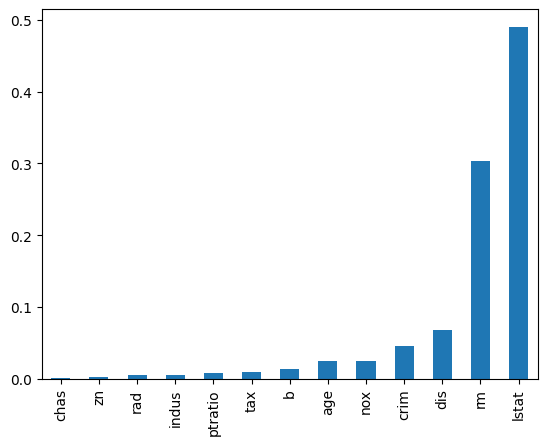

In [28]:
from sklearn.ensemble import RandomForestRegressor

def rfc_feature_selection(dataset,target):
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.3, random_state=42)
    rfc = RandomForestRegressor(random_state=42)
    rfc.fit(X_train, y_train)
    #y_pred = rfc.predict(X_test)
    rfc_importances = pd.Series(rfc.feature_importances_, index=dataset.columns).sort_values()
    rfc_importances.plot(kind='bar')
    plt.show()
    
    return rfc_importances

rfc_importances = rfc_feature_selection(X,y)
rfc_importances = rfc_importances.sort_values(ascending=False)
feature_importances = list(rfc_importances.index) #list of feature names sorted on importance

# Machine Learning model

In [29]:
feature_importances

['lstat',
 'rm',
 'dis',
 'crim',
 'nox',
 'age',
 'b',
 'tax',
 'ptratio',
 'indus',
 'rad',
 'zn',
 'chas']

In [30]:
len(feature_importances)

13

In [31]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [32]:
maes = []
r_squared_scores = []
adjusted_r_squared_scores = []

for i in range(len(feature_importances)):
    selected_features = feature_importances[:i+1]
    X_subset = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.33, random_state=21)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred_test)
    maes.append(mae)
    #print('Mean absolute error:', mae)
    
    r_squared_score = r2_score(y_test, y_pred_test)
    r_squared_scores.append(r_squared_score)
    #print('R2 score:', r_squared_score)
    
    adjusted_r_squared_score = 1 - ((1 - r_squared_score) * (len(y) - 1)) / (len(y) - len(selected_features) - 1)
    adjusted_r_squared_scores.append(adjusted_r_squared_score)
    #print('Adjusted R2 score:', adjusted_r_squared_score)
    
    #print()

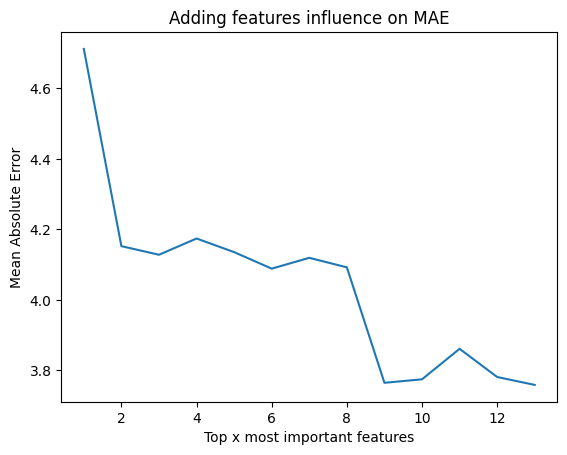

In [33]:
plt.plot(range(1, len(feature_importances)+1), maes)
plt.xlabel('Top x most important features')
plt.ylabel('Mean Absolute Error')
plt.title('Adding features influence on MAE')
plt.show()

In [34]:
#plt.plot(range(1, len(feature_importances)+1), r_squared_scores)
#plt.xlabel('Top x most important features')
#plt.ylabel('R^2 score')
#plt.title('Adding features influence on R^2 score')
#plt.show()

In [35]:
#plt.plot(range(1, len(feature_importances)+1), adjusted_r_squared_scores)
#plt.xlabel('Top x most important features')
#plt.ylabel('Adjusted R^2 score')
#plt.title('Adding features influence on adjusted R^2 score')
#plt.show()

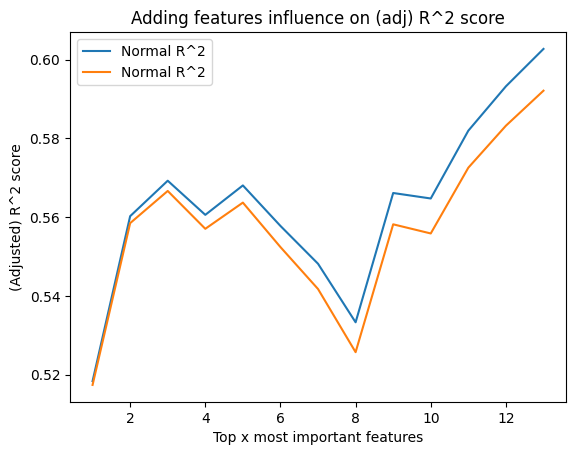

In [36]:
plt.plot(range(1, len(feature_importances)+1), r_squared_scores, label = "Normal R^2")
plt.plot(range(1, len(feature_importances)+1), adjusted_r_squared_scores, label = "Normal R^2")
plt.xlabel('Top x most important features')
plt.ylabel('(Adjusted) R^2 score')
plt.title('Adding features influence on (adj) R^2 score')
plt.legend()
plt.show()

# How to continue?

Since we added the features constructively, we can now try and add the first 2 features in the list, then try and add the 9th, 11th and 12th features?